In [1]:
#Imports
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1)

In [2]:
#matplotlib and sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
# import sklearn.datasets - may not need this as we have a dataset to work with

The original csv included columns that counted out perfect Skittles and defective Skittles which were then added up in the CSV.
These columns were removed because they weren't necessary and we could just do a df.sum() later.

In [3]:
# Reading as a dataframe
df = pd.read_csv('skittles_fixed.csv')
df.head(10)

,bag_number,purple,green,red,yellow,orange,d_purple,d_green,d_red,d_yellow,d_orange
0,1,3,25,6,14,6,0,0,2,1,1
1,2,12,11,10,14,9,0,1,2,1,4
2,3,8,13,6,17,10,0,5,0,1,1
3,4,13,9,12,9,10,1,0,2,1,1
4,5,13,7,8,13,11,0,0,1,1,3
5,6,17,7,10,14,8,0,0,3,0,1
6,7,5,7,21,8,14,2,1,2,0,2
7,8,14,7,13,11,11,2,0,1,1,1
8,9,13,10,8,16,6,0,2,2,1,2
9,10,11,14,6,10,12,0,4,0,1,1


We then tried to create an array of arrays out of the Skittles, but ran into an issue with having a proper X and y axis.

In [4]:
skittles_data = pd.read_csv('skittles_fixed.csv')
X = skittles_data.iloc[0:100].values
X

array([[  1,   3,  25, ...,   2,   1,   1],
       [  2,  12,  11, ...,   2,   1,   4],
       [  3,   8,  13, ...,   0,   1,   1],
       ...,
       [ 98,   5,  12, ...,   3,   3,   0],
       [ 99,   9,  13, ...,   0,   1,   2],
       [100,  10,  10, ...,   3,   0,   4]], dtype=int64)

In [5]:
#looking at the df again...
df.head()

,bag_number,purple,green,red,yellow,orange,d_purple,d_green,d_red,d_yellow,d_orange
0,1,3,25,6,14,6,0,0,2,1,1
1,2,12,11,10,14,9,0,1,2,1,4
2,3,8,13,6,17,10,0,5,0,1,1
3,4,13,9,12,9,10,1,0,2,1,1
4,5,13,7,8,13,11,0,0,1,1,3


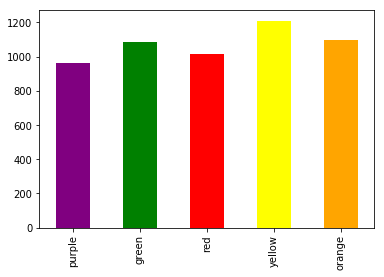

In [6]:
#Creating visualization from a SUM across the Skittles totals (sorted by colors)
df.sum()[['purple', 'green', 'red', 'yellow', 'orange']].plot(kind='bar', color=['purple', 'green', 'red', 'yellow', 'orange'])

In [7]:
# Getting numerical sums
df.sum()

bag_number    5052
purple         964
green         1087
red           1014
yellow        1211
orange        1095
d_purple       107
d_green        215
d_red          172
d_yellow        67
d_orange       214
dtype: int64

We were hoping that the Histograms would reveal some consistency with how the Skittles were disbursed.
The most consistent thing about the bags was how inconsistently they were packed.

In [12]:
x_color = 'yellow'
y = df[[color for color in ['purple', 'green', 'red', 'yellow', 'orange'] if color != x_color]]
X = df[x_color]

X.head()
y.head()

,purple,green,red,orange
0,3,25,6,6
1,12,11,10,9
2,8,13,6,10
3,13,9,12,10
4,13,7,8,11


Our approach shifted to see if we could accurately predict the counts of four (4) color groups of Skittles by comparing it to the color and count of ONE group.  Pull one color out for the X value and see if we can predict the remaining colors as our y values.  "If we have X amount of reds, then we have y amount of Green, Orange, Purple, and Yellow."

This is what's called a Mulitvariate Problem (when we're trying to determine an outcome based on multiple y values).

### TEST 1: X = Orange, y = purple, green, red, and yellow.

In [30]:
y = df[['purple', 'green', 'red', 'yellow',]]
X = df[ 'orange'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.06338801628322363

Good News - Nate has never seen a score this bad, so... there's that.
#### Bad News - NATE HAS NEVER SEEN A SCORE THIS BAD.
We actually got a NEGATIVE R Squared Score on our first pass.

In [31]:
#Need to round and try to determine
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['purple', 'green', 'red', 'yellow',])

,purple,green,red,yellow
0,9.031032,10.409558,10.071386,10.925546


### TEST 2: X = Yellow, y = Purple, Green, Red, and Orange.

In [32]:
y = df[['purple','green','red','orange']]
X = df['yellow'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.04532489945226881

In [33]:
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['purple', 'green', 'red','orange'])

,purple,green,red,orange
0,9.656418,10.799708,10.184133,11.0359


### TEST 3: X = Purple, y = Green, Red, Orange, and Yellow.

In [34]:
y = df[['green','red','orange','yellow']]
X = df['purple'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.04008933126969889

In [35]:
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['green', 'red','orange','yellow'])

,green,red,orange,yellow
0,9.87103,9.821682,10.189474,12.01225


### TEST 4: X = Green, y = Orange, Purple, Red, and Yellow.

In [36]:
y = df[['orange','purple','red','yellow']]
X = df['green'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.06458680246408213

In [37]:
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['orange','purple','red','yellow'])

,orange,purple,red,yellow
0,11.130016,9.476738,9.858716,12.352016


### TEST 5: X = Red, y = Orange, Purple, Yellow, and Green.

In [38]:
y = df[['orange','purple','yellow','green']]
X = df['red'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.007651224233469255

In [39]:
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['orange','purple','yellow','green'])

,orange,purple,yellow,green
0,11.079052,9.888236,12.325207,11.075992


### EXTRA TEST - Does adding the defective Skittles change our scores?

In [28]:
y = df[['orange','purple','yellow','green','d_orange','d_purple','d_yellow','d_green']]
X = df['red'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.11486837767018923

In [29]:
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['orange','purple','yellow','green','d_orange','d_purple','d_yellow','d_green'])

,orange,purple,yellow,green,d_orange,d_purple,d_yellow,d_green
0,10.218246,9.276491,12.138947,10.350877,2.037193,0.722105,0.703158,2.078596


### What did we learn?

It doesn't appear that adding the defective Skittles changes our scoring model.  Rather than being predictive based on machine learning, it appears that the data lends itself to a Burnoulli Model - meaning that the estimation of the bag contents relies more on averages to infer a guess.

### Will adding an additional 468 packs change the results?
Let's find out!

In [41]:
#Using the power of the Internet...
df_468 = pd.read_csv('skittles_468.csv')
df_468.head()

,purple,green,red,yellow,orange,uncounted
0,18,7,10,11,15,0
1,10,15,5,17,12,0
2,9,11,16,15,11,0
3,7,16,15,13,8,0
4,7,8,11,20,14,1


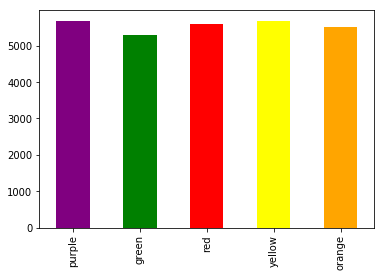

In [44]:
#Creating visualization with additional Skittles
df_468.sum()[['purple', 'green', 'red', 'yellow', 'orange']].plot(kind='bar', color=['purple', 'green', 'red', 'yellow', 'orange'])

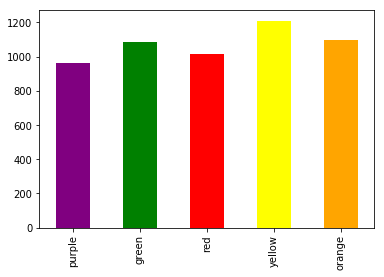

In [45]:
#Comparison to original 100 packs
df.sum()[['purple', 'green', 'red', 'yellow', 'orange']].plot(kind='bar', color=['purple', 'green', 'red', 'yellow', 'orange'])

In [51]:
#Get Nate's help on this one...basically want to append one df to another df
df_100 = pd.read_csv('skittles_fixed.csv')
pd.merge(df_100, df_468, on='purple')

,bag_number,purple,green_x,red_x,yellow_x,orange_x,d_purple,d_green,d_red,d_yellow,d_orange,green_y,red_y,yellow_y,orange_y,uncounted
0,1,3,25,6,14,6,0,0,2,1,1,11,14,15,14,0
1,54,3,9,10,15,16,1,2,3,1,10,11,14,15,14,0
2,2,12,11,10,14,9,0,1,2,1,4,11,14,13,12,0
3,2,12,11,10,14,9,0,1,2,1,4,11,12,18,6,1
4,2,12,11,10,14,9,0,1,2,1,4,8,16,15,13,0
5,2,12,11,10,14,9,0,1,2,1,4,11,8,16,13,0
6,2,12,11,10,14,9,0,1,2,1,4,6,18,11,14,0
7,2,12,11,10,14,9,0,1,2,1,4,10,14,11,14,0
8,2,12,11,10,14,9,0,1,2,1,4,11,14,10,14,0
9,2,12,11,10,14,9,0,1,2,1,4,17,13,9,9,0
